In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# type csv that be wanted to open
data = pd.read_csv('./StarforceSimulator/20210321_171531.csv')

# delete inner csv index
data.drop(data.columns[[0]], axis=1, inplace=True)

df = []
df_mdc = []

for i in range(0, 4):
    df.append(data.loc[(data['Prevention'] == i//2) & (data['Starcatch'] == i&1)])
    df_mdc.append(df[i][['Total spend meso', 'Total destroy count', 'Total try count']])

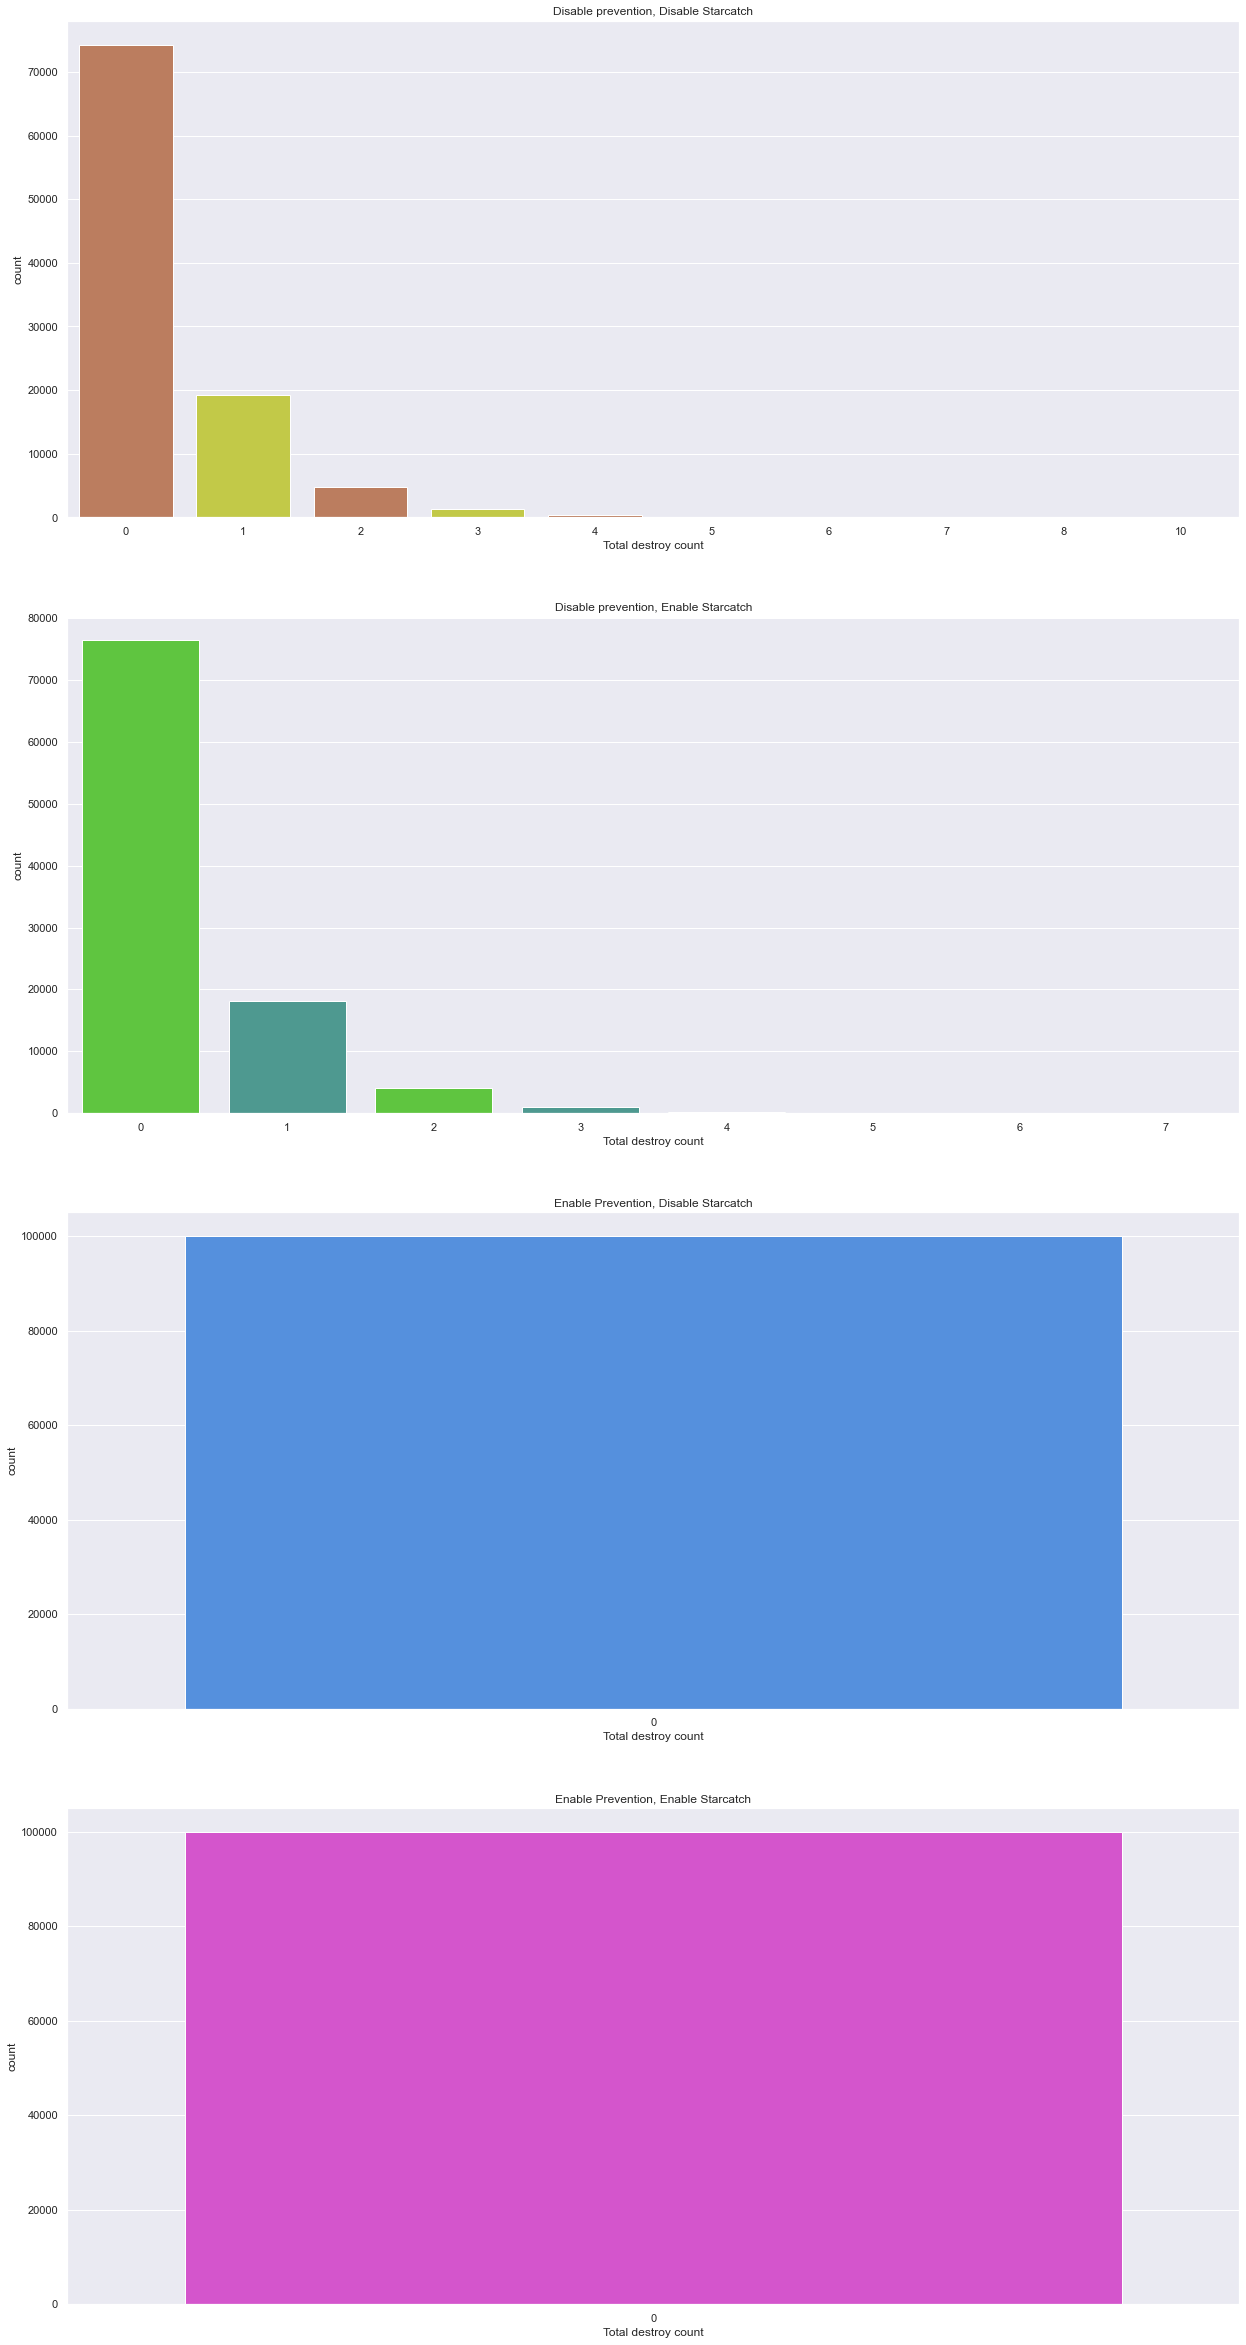

In [2]:
sns.set(rc={'figure.figsize':(21, 42)})
fig1, ax1 = plt.subplots(4, 1)

plotpalette = [["#CA7850","#D5DE33"], 
               ["#53DB2A","#42A59A"], 
               ["#3F8DF3","#BA87F1"], 
               ["#E940DF","#F37FA2"]]

plottitle = ["Disable prevention, Disable Starcatch",
             "Disable prevention, Enable Starcatch",
             "Enable Prevention, Disable Starcatch",
             "Enable Prevention, Enable Starcatch"]
df_mdc_sns_count = []

for i in range(0, 4):
    df_mdc_sns_count.append(df_mdc[i].loc[df_mdc[i]['Total destroy count'] <= 30])
    sns.countplot(x='Total destroy count', data=df_mdc_sns_count[i], palette=plotpalette[i], ax=ax1[i])
    ax1[i].set_title(plottitle[i])

plt.show()

In [3]:
df_mdc_count = []

for i in range(0, 4):
    df_mdc_count.append(df_mdc[i].groupby('Total destroy count').count())
    df_mdc_count[i].drop(df_mdc_count[i].columns[[0]], axis=1, inplace=True)
    df_mdc_count[i].columns = ["count"]
    df_mdc_count[i].reset_index(level=['Total destroy count'], inplace=True)

# calculate mean
df_mdc_mean = []
for i in range(0, 4):
    tempcount = 0
    tempcountsum = 0
    for index, row in df_mdc_count[i].iterrows():
        tempcount += row['Total destroy count']*row['count']
        tempcountsum += row['count']
    
    tempcount = round(tempcount/tempcountsum, 2)
    df_mdc_mean.append(tempcount)

res = df_mdc_count[0]
for i in range(1, 4):
    res = pd.merge(res, df_mdc_count[i], how='left', on=['Total destroy count'])

res.fillna(0, inplace = True)
res.columns = ['Total destroy count', 
               'Disable Prevention, Disable Starcatch', 
               'Disable Prevention, Enable Starcatch', 
               'Enable Prevention, Disable Starcatch', 
               'Enable Prevention, Enable Starcatch']

# delete destroy count
res = res.T.iloc[1:]
res = res.T.iloc[:31]

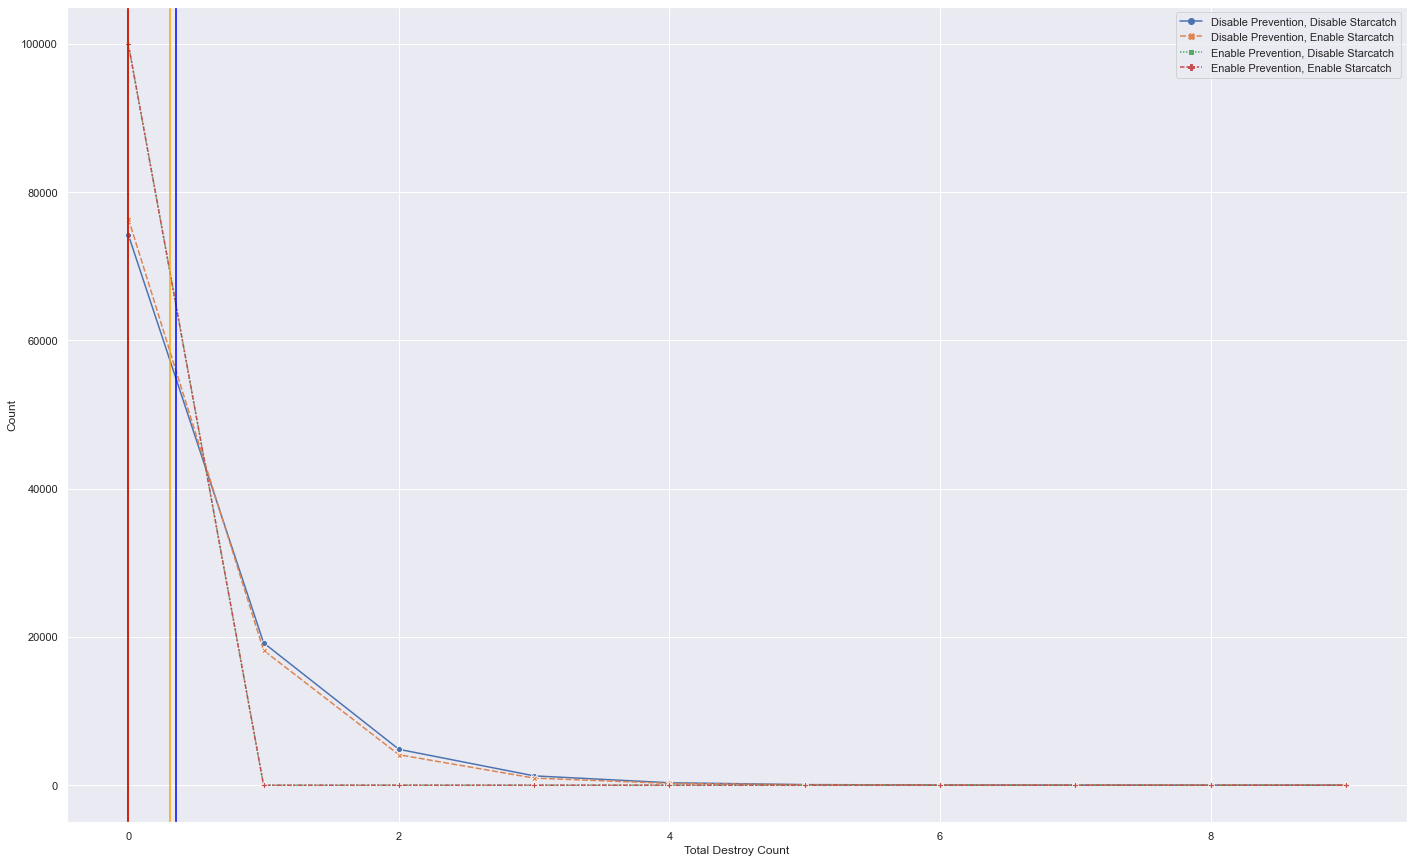

In [4]:
sns.set(rc={'figure.figsize':(24, 15)})
fig2, ax2 = plt.subplots(1)

meancolor = ['blue', 'orange', 'green', 'red']

sns.lineplot(data=res, markers=True, ax = ax2)

for i in range(0, 4):
    ax2.axvline(df_mdc_mean[i], color=meancolor[i], linestyle = '-')

ax2.set_xlabel("Total Destroy Count")
ax2.set_ylabel("Count")
plt.show()


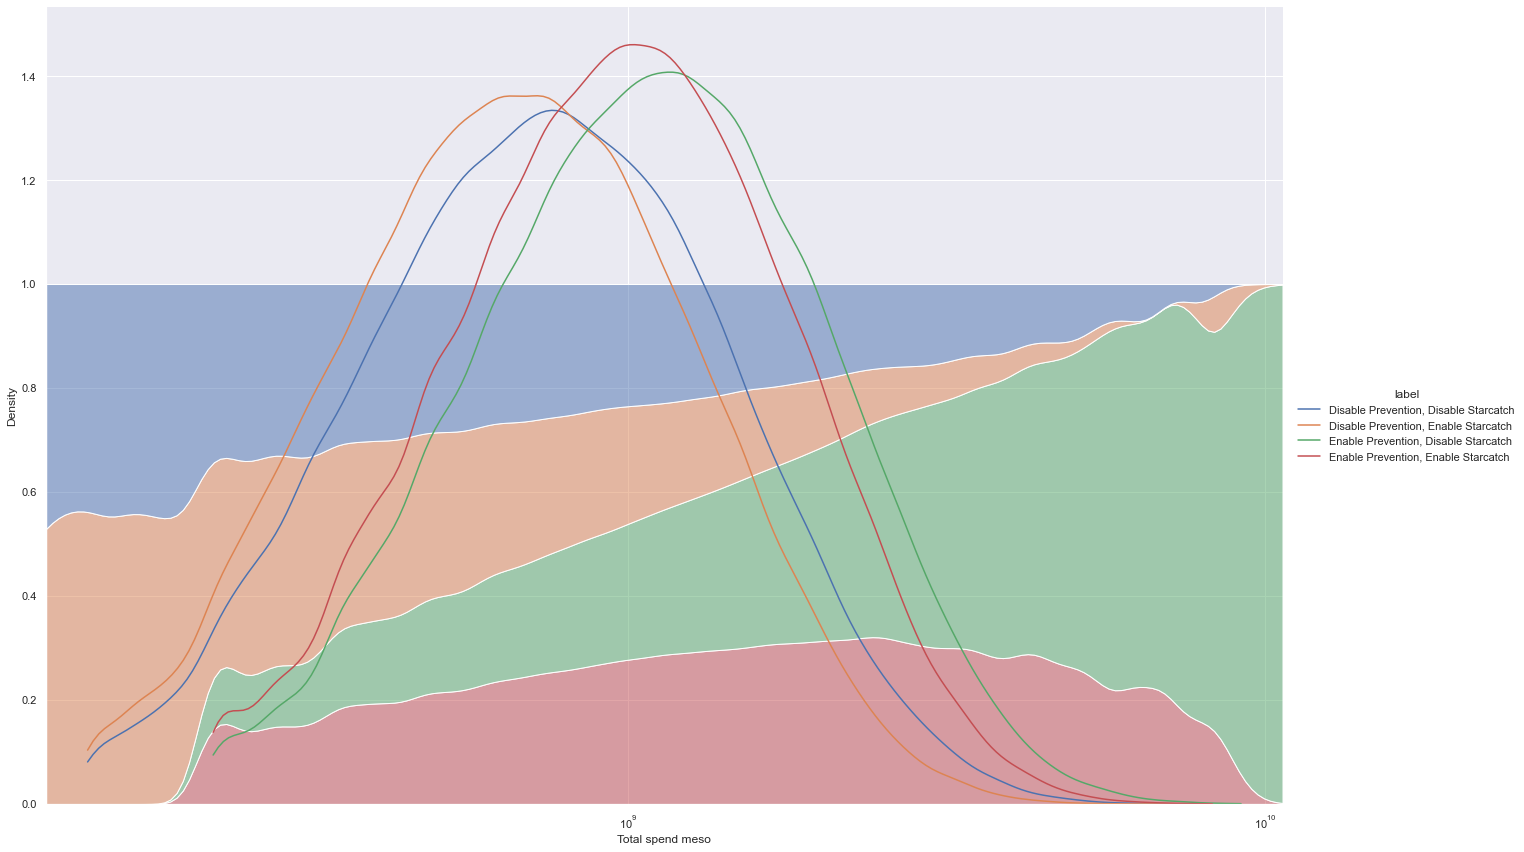

In [5]:
# spending meso distribution with log scale

sns.set(rc={'figure.figsize':(26, 12)})

label = ['Disable Prevention, Disable Starcatch', 
         'Disable Prevention, Enable Starcatch', 
         'Enable Prevention, Disable Starcatch', 
         'Enable Prevention, Enable Starcatch']

df_meso_dist = []
for i in range(0, 4):
    df_meso_dist.append(df_mdc[i][['Total spend meso']])
    df_meso_dist[i].columns = ['Total spend meso']
    df_meso_dist[i] = df_meso_dist[i].reset_index(drop=True)
    df_meso_dist[i]['label'] = label[i]
    
res = pd.concat(df_meso_dist)

g = sns.FacetGrid(res, hue='label', height = 12, aspect = 1.5)
g = (g.map(sns.kdeplot, 'Total spend meso', log_scale=True, common_norm=False, alpha=.25, cut=0))
sns.kdeplot(data=res, x='Total spend meso', hue='label', log_scale=True, common_norm=False, alpha=.5, multiple="fill", legend=False)
g.add_legend()

plt.show()